In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import os
import cv2

In [2]:
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

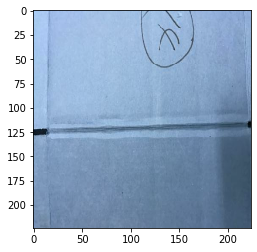

In [43]:
DIR = os.getcwd() + "\\images\\colours"
CATEGORIES = [c for c in os.listdir(DIR)]

for CAT in CATEGORIES:
    PATH = os.path.join(DIR, CAT)
    for img in os.listdir(PATH):
        img_arr = cv2.imread(os.path.join(PATH, img))
        img_arr = cv2.resize(img_arr, (224, 224))
        img_arr = image.img_to_array(img_arr)
        img_arr = img_arr / 255
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break

In [44]:
X, y = [], []

for CAT in CATEGORIES:
    PATH = os.path.join(DIR, CAT)
    label = CATEGORIES.index(CAT)
    for img in os.listdir(PATH):
        img_arr = cv2.imread(os.path.join(PATH, img))
        img_arr = cv2.resize(img_arr, (224, 224))
        img_arr = image.img_to_array(img_arr)
        img_arr = img_arr / 255.0
        X.append(img_arr)
        y.append(label)

In [45]:
X = np.array(X)
y = to_categorical(y)

In [46]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.1)

aug = image.ImageDataGenerator(
            rotation_range = 20,
            zoom_range=0.15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.15,
            horizontal_flip=True,
            fill_mode="nearest")

In [47]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
import tensorflow.keras.layers as ly
from tensorflow.keras.callbacks import ModelCheckpoint

In [55]:
model = Sequential()
model.add(ly.Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(ly.Activation("relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Conv2D(64, (3, 3)))
model.add(ly.Activation("relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Conv2D(32, (3, 3)))
model.add(ly.Activation("relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Flatten())
model.add(ly.Dense(64, activation="relu"))
model.add(ly.Dense(len(CATEGORIES), activation="softmax"))

In [60]:
model_path = "garbage.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callback = [checkpoint]

In [61]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_15 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_16 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 32)       

In [62]:
BATCH_SIZE = 4

his = model.fit(aug.flow(train_x, train_y, batch_size=BATCH_SIZE),
         steps_per_epoch=len(train_x) // BATCH_SIZE,
         validation_data=(test_x, test_y),
         validation_steps=len(test_x) // BATCH_SIZE,
         epochs=100,
         callbacks=callback)

Epoch 1/100
568/568 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.6797WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.69565, saving model to garbage.h5
568/568 [==============================] - 32s 56ms/step - loss: 0.2402 - accuracy: 0.6797 - val_loss: 0.2594 - val_accuracy: 0.6957
Epoch 2/100
568/568 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.7000WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00002: val_accuracy did not improve from 0.69565
56


Epoch 00015: val_accuracy improved from 0.75494 to 0.77866, saving model to garbage.h5
568/568 [==============================] - 28s 48ms/step - loss: 0.1926 - accuracy: 0.7498 - val_loss: 0.2215 - val_accuracy: 0.7787
Epoch 16/100
567/568 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.7590WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00016: val_accuracy did not improve from 0.77866
568/568 [==============================] - 28s 49ms/step - loss: 0.1921 - accuracy: 0.7590 - val_loss: 0.2245 - val_accuracy: 0.7628
Epoch 17/100
567/568 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.7546WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at lea


Epoch 00030: val_accuracy did not improve from 0.79842
568/568 [==============================] - 28s 49ms/step - loss: 0.1624 - accuracy: 0.7903 - val_loss: 0.2219 - val_accuracy: 0.7668
Epoch 31/100
567/568 [============================>.] - ETA: 0s - loss: 0.1667 - accuracy: 0.7948WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00031: val_accuracy did not improve from 0.79842
568/568 [==============================] - 27s 48ms/step - loss: 0.1671 - accuracy: 0.7943 - val_loss: 0.2797 - val_accuracy: 0.6957
Epoch 32/100
568/568 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.7740WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` ba


Epoch 00045: val_accuracy did not improve from 0.82213
568/568 [==============================] - 31s 54ms/step - loss: 0.1571 - accuracy: 0.8079 - val_loss: 0.2079 - val_accuracy: 0.7905
Epoch 46/100
567/568 [============================>.] - ETA: 0s - loss: 0.1567 - accuracy: 0.8108WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00046: val_accuracy did not improve from 0.82213
568/568 [==============================] - 30s 53ms/step - loss: 0.1566 - accuracy: 0.8110 - val_loss: 0.2537 - val_accuracy: 0.7747
Epoch 47/100
567/568 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.8217WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` ba


Epoch 00060: val_accuracy did not improve from 0.82609
568/568 [==============================] - 28s 49ms/step - loss: 0.1458 - accuracy: 0.8220 - val_loss: 0.2284 - val_accuracy: 0.7905
Epoch 61/100
568/568 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.8282WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00061: val_accuracy did not improve from 0.82609
568/568 [==============================] - 27s 48ms/step - loss: 0.1423 - accuracy: 0.8282 - val_loss: 0.3064 - val_accuracy: 0.7391
Epoch 62/100
568/568 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.8379WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` ba


Epoch 00075: val_accuracy did not improve from 0.83794
568/568 [==============================] - 37s 66ms/step - loss: 0.1334 - accuracy: 0.8370 - val_loss: 0.2145 - val_accuracy: 0.7984
Epoch 76/100
568/568 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.8339WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00076: val_accuracy did not improve from 0.83794
568/568 [==============================] - 37s 65ms/step - loss: 0.1369 - accuracy: 0.8339 - val_loss: 0.1885 - val_accuracy: 0.8103
Epoch 77/100
568/568 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.8291WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` ba


Epoch 00090: val_accuracy did not improve from 0.86166
568/568 [==============================] - 32s 55ms/step - loss: 0.1270 - accuracy: 0.8476 - val_loss: 0.1816 - val_accuracy: 0.8379
Epoch 91/100
568/568 [==============================] - ETA: 0s - loss: 0.1437 - accuracy: 0.8370WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 63 batches). You may need to use the repeat() function when building your dataset.

Epoch 00091: val_accuracy did not improve from 0.86166
568/568 [==============================] - 42s 74ms/step - loss: 0.1437 - accuracy: 0.8370 - val_loss: 0.2094 - val_accuracy: 0.8103
Epoch 92/100
568/568 [==============================] - ETA: 0s - loss: 0.1289 - accuracy: 0.8383WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` ba

In [64]:
model.save("models/garbage_accuracy.h5")

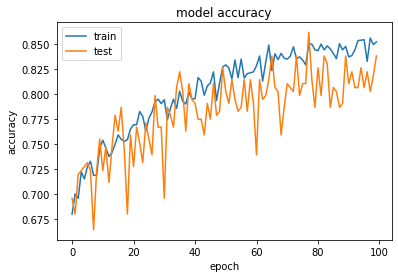

In [72]:
import matplotlib.pyplot as plt

# HISTORY FOR ACCURACY
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()

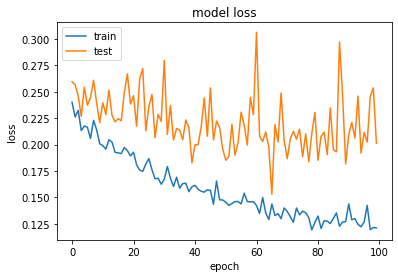

In [74]:
# HISTORY FOR LOSS
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss.png")
plt.show()